In [3]:
import pandas as pd

foodCSV = 'wfp_food_prices_phl.csv'
foodData = pd.read_csv(foodCSV)

print(foodData.head())
print(foodData.columns)

         date                   admin1               admin2            market  \
0       #date               #adm1+name           #adm2+name  #loc+market+name   
1  2000-01-15  National Capital region  Metropolitan Manila      Metro Manila   
2  2000-01-15  National Capital region  Metropolitan Manila      Metro Manila   
3  2000-01-15  National Capital region  Metropolitan Manila      Metro Manila   
4  2000-01-15  National Capital region  Metropolitan Manila      Metro Manila   

    latitude   longitude            category                commodity  \
0   #geo+lat    #geo+lon          #item+type               #item+name   
1  14.604167  120.982222  cereals and tubers     Maize flour (yellow)   
2  14.604167  120.982222  cereals and tubers  Rice (milled, superior)   
3  14.604167  120.982222  cereals and tubers  Rice (milled, superior)   
4  14.604167  120.982222  cereals and tubers   Rice (regular, milled)   

         unit         priceflag         pricetype   currency   price  \
0 

C:\Users\User\AppData\Local\Temp\ipykernel_13396\2105571810.py:4: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  foodData = pd.read_csv(foodCSV)


C:\Users\User\AppData\Local\Temp\ipykernel_13396\4268909009.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_increase = pivoted.pct_change().fillna(0)


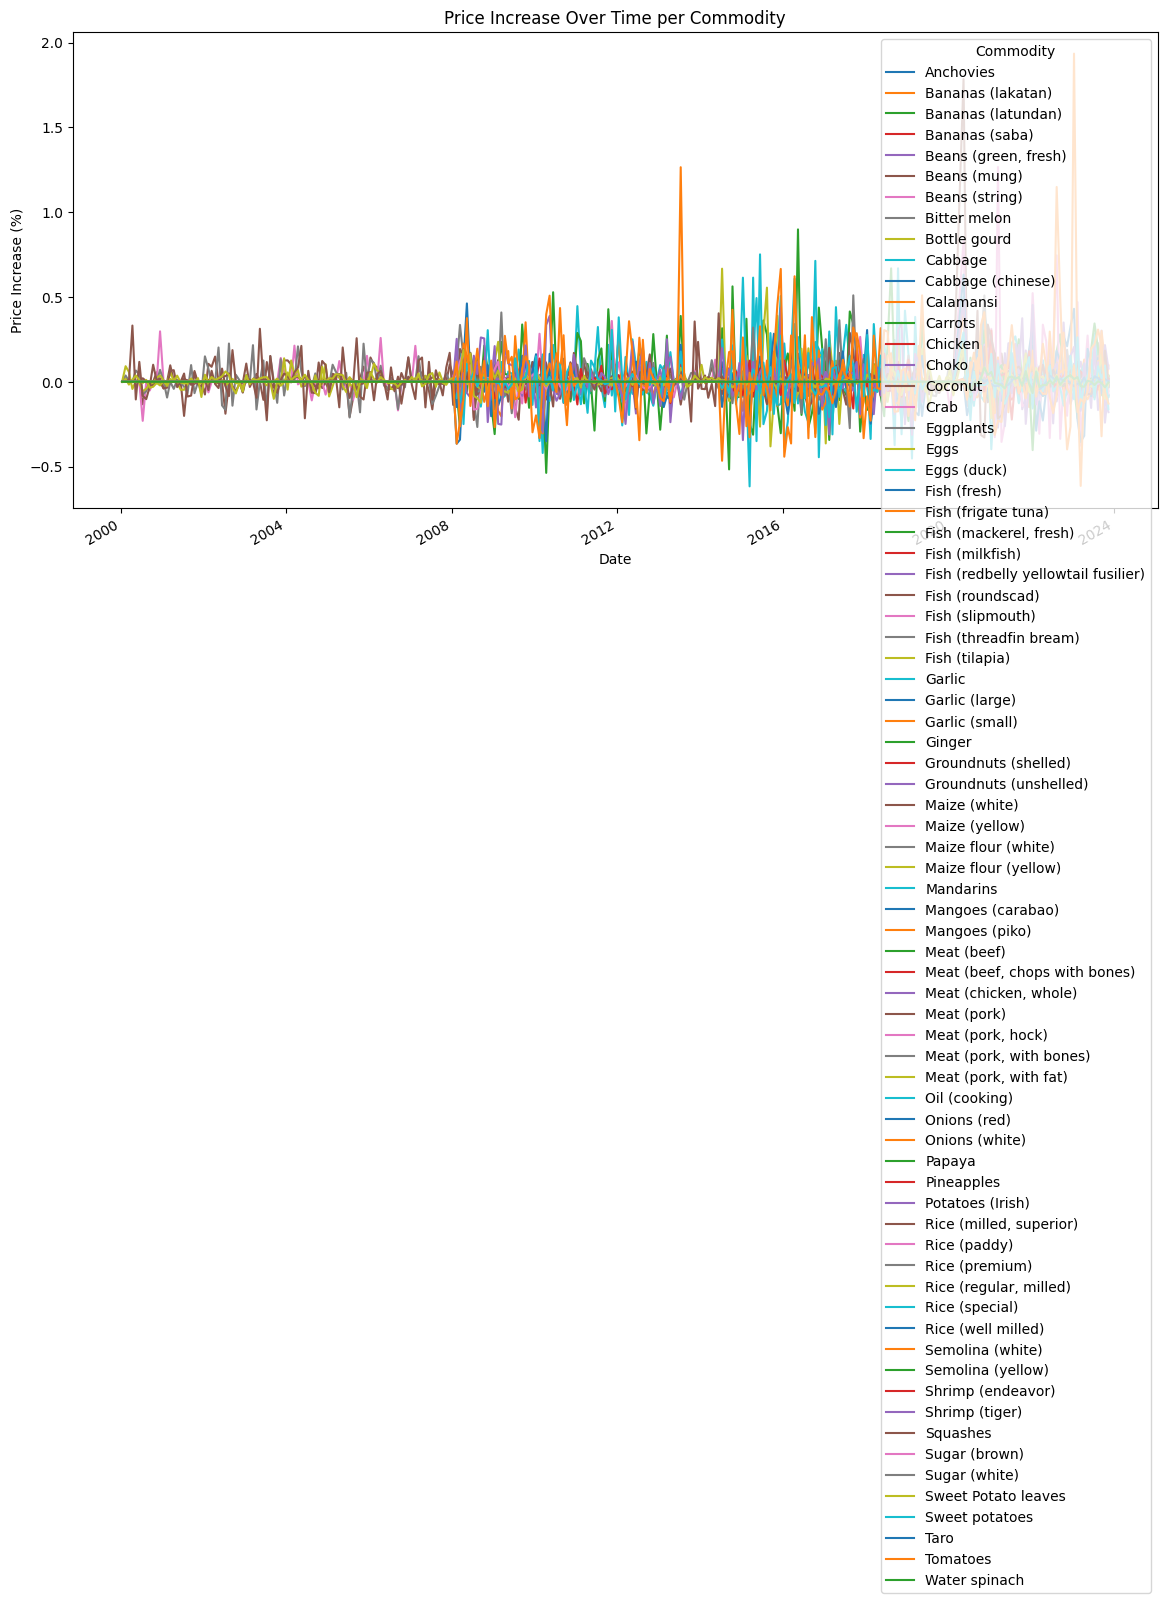

In [13]:
import matplotlib.pyplot as plt

# Parse the date column to datetime
foodData['date'] = pd.to_datetime(foodData['date'])

# Group by commodity and date, then calculate the mean price
grouped = foodData.groupby(['commodity', 'date'])['price'].mean().reset_index()

# Pivot the data to have commodities as columns and dates as index
pivoted = grouped.pivot(index='date', columns='commodity', values='price')

# Calculate the price increase
price_increase = pivoted.pct_change().fillna(0)

# Plot the time series for each commodity
price_increase.plot(figsize=(14, 7))
plt.title('Price Increase Over Time per Commodity')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend(title='Commodity')
plt.show()



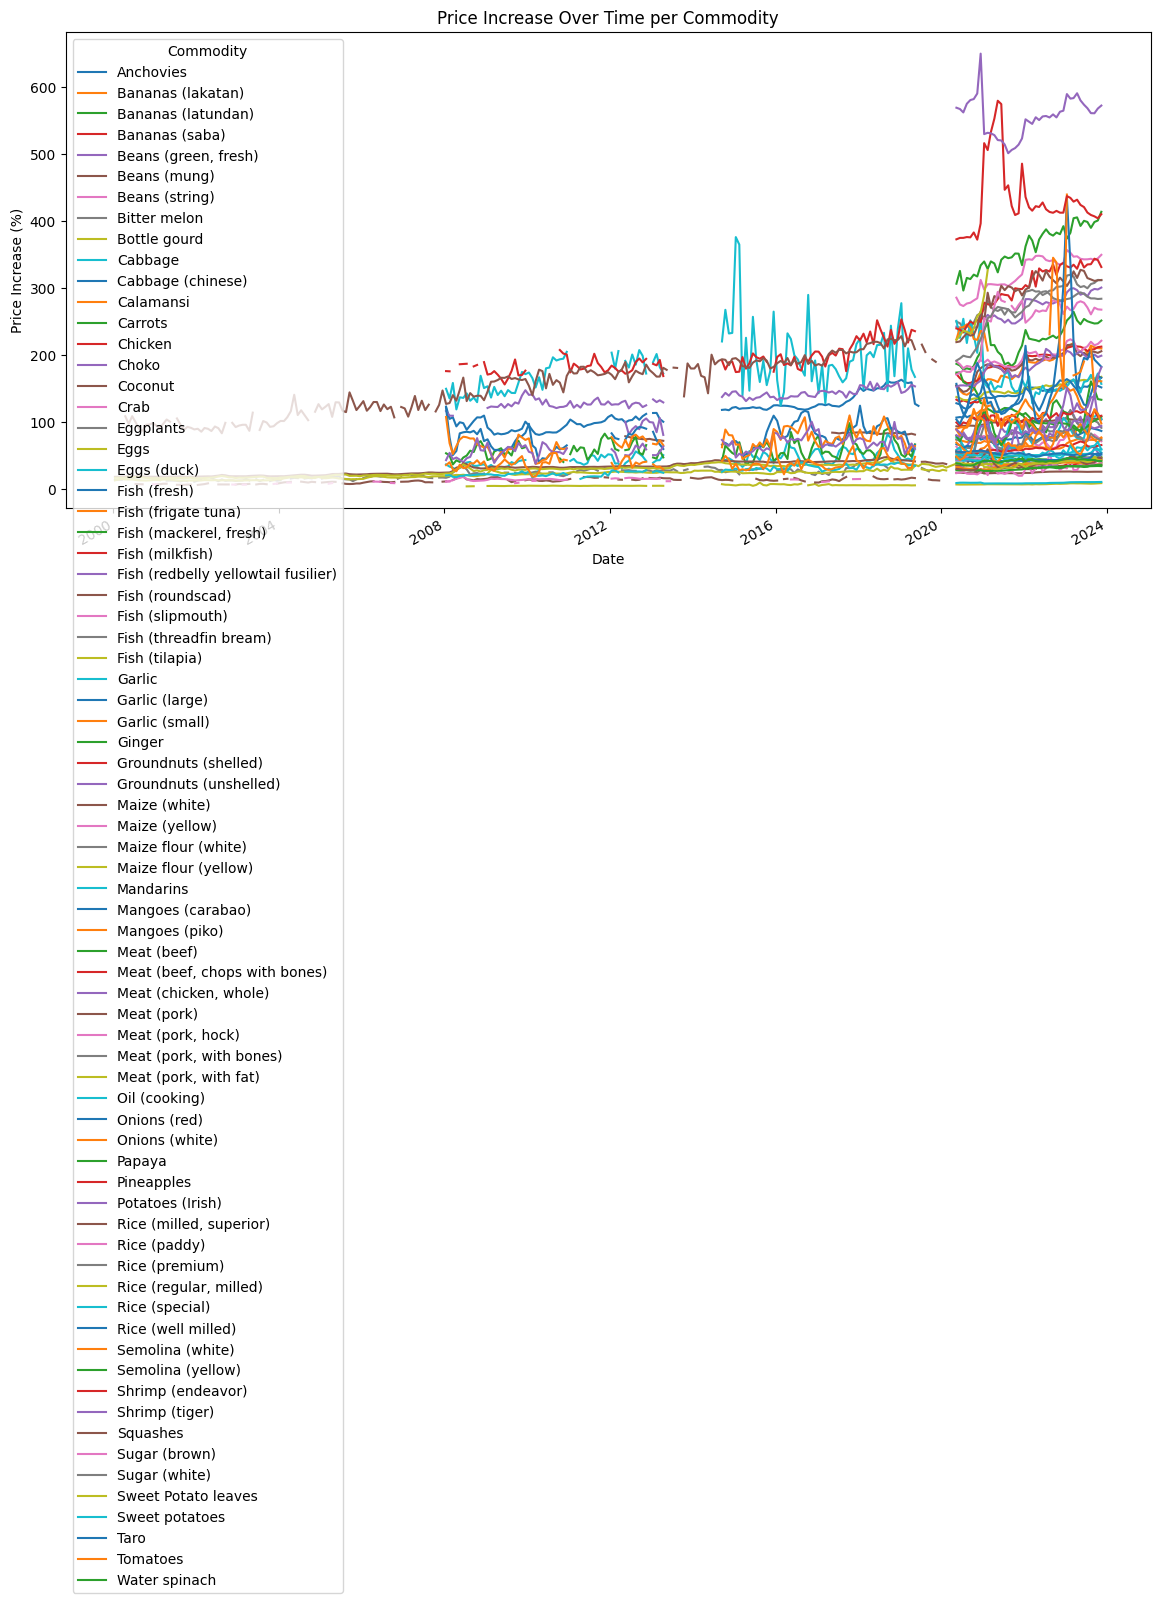

In [14]:
# Group by commodity and date, then calculate the mean price
grouped = foodData.groupby(['commodity', 'date'])['price'].mean().reset_index()

# Pivot the data to have commodities as columns and dates as index
pivoted = grouped.pivot(index='date', columns='commodity', values='price')


# Plot the time series for each commodity
pivoted.plot(figsize=(14, 7))
plt.title('Price Increase Over Time per Commodity')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend(title='Commodity')
plt.show()

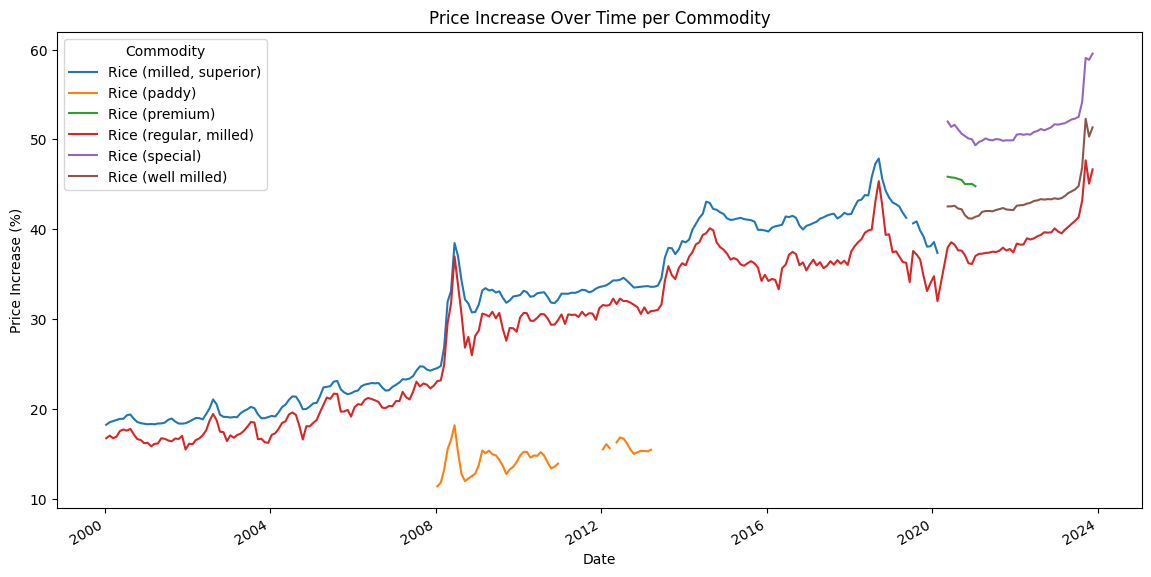

In [15]:
# Group by commodity and date, then calculate the mean price
grouped = foodData.groupby(['commodity', 'date'])['price'].mean().reset_index()
# Filter the grouped data to include only rows where the commodity contains 'rice' (case insensitive)
grouped = grouped[grouped['commodity'].str.contains('rice', case=False, regex=True)]
# Pivot the data to have commodities as columns and dates as index
pivoted = grouped.pivot(index='date', columns='commodity', values='price')


# Plot the time series for each commodity
pivoted.plot(figsize=(14, 7))
plt.title('Price Increase Over Time per Commodity')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend(title='Commodity')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13396\1838657899.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_increase = pivoted.pct_change().fillna(0)


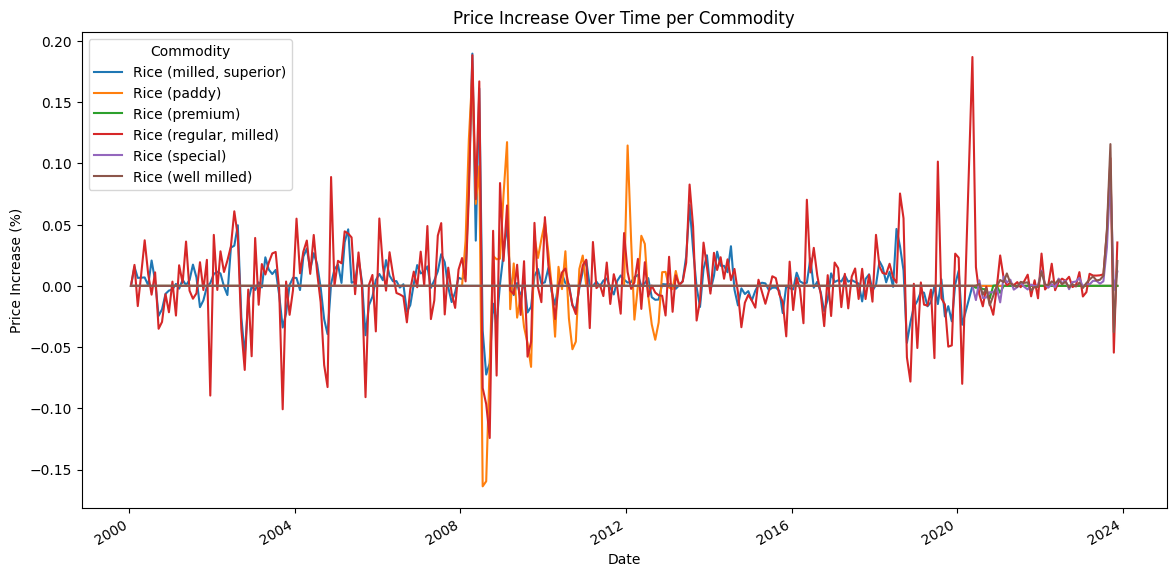

In [17]:
# Group by commodity and date, then calculate the mean price
grouped = foodData.groupby(['commodity', 'date'])['price'].mean().reset_index()
# Filter the grouped data to include only rows where the commodity contains 'rice' (case insensitive)
grouped = grouped[grouped['commodity'].str.contains('rice', case=False, regex=True)]
# Pivot the data to have commodities as columns and dates as index
pivoted = grouped.pivot(index='date', columns='commodity', values='price')

# Calculate the price increase
price_increase = pivoted.pct_change().fillna(0)

# Plot the time series for each commodity
price_increase.plot(figsize=(14, 7))
plt.title('Price Increase Over Time per Commodity')
plt.xlabel('Date')
plt.ylabel('Price Increase (%)')
plt.legend(title='Commodity')
plt.show()

In [18]:
from prophet import Prophet
import numpy as np

# Fix for np.float_ issue in Prophet
np.float_ = np.float64

# Prepare the data for Prophet
# We will use the 'date' and 'price' columns from the 'grouped' DataFrame
rice_data = grouped[grouped['commodity'].str.contains('rice', case=False, regex=True)]
rice_data = rice_data[['date', 'price']]
rice_data.columns = ['ds', 'y']

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(rice_data)

# Create a dataframe to hold predictions
future = model.make_future_dataframe(periods=120, freq='M')  # Predicting for the next 10 years (120 months)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Rice Price Prediction until 2030')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

d:\GITHUB\food-data-philippines-2000-2023-per-day\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.